# Exploratory Analysis of the Soccer Players Dataset


## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data wrangling">Data Wrangling</a></li>
<li><a href="#explore">Exploratory data analysis and Research questions</a></li>
<li><a href="#conclusion">Conclusion & Limitation</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This project analyzes the [European Soccer Players Dataset](https://www.kaggle.com/datasets/hugomathien/soccer) from Kaggle. This dataset was downloaded from Udacity classroom database and uploaded to a [drive](https://drive.google.com/file/d/1EAo2ICmKgeyU1KHF2061AT4arIxLpWrX/view?usp=sharing) for easy referencing

### Question for Analysis
1. What is the average age of soccer players?
2. What is the average height of soccer players?
3. What is the average weight of soccer players?
4. Does the age of soccer players determine their height or weight?

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='data wrangling'></a>
## Data Wrangling

> Here, I will load the data using pandas dataframe read_csv function. I will check for cleanliness, missing values and duplicated data, drop unneeded columns.

In [2]:
df = pd.read_csv("./player.csv",parse_dates=['birthday'], keep_date_col=True)
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


In [3]:
df.shape

(11060, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


**check for null values**

In [5]:
df.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

The data is complete and does not contain any missing values. I will now check for duplicates

In [6]:
df.duplicated().sum()

0

The data does not contain any duplicate value. 

### Data Cleaning
Here, I'll remove unneeded data. The id column is not needed and would be dropped now.

In [ ]:
# This would drop the id column since it is not needed and the index would suffice
df.drop('id', axis=1, inplace=True)

In [31]:
df.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30
1,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,32
2,162549,Aaron Doran,186170,1991-05-13,170.18,163,31
3,30572,Aaron Galindo,140161,1982-05-08,182.88,198,40
4,23780,Aaron Hughes,17725,1979-11-08,182.88,154,42


Here, I created the function to calculate players age from their date of birth

In [32]:
# This function calculates age from the players birth date
def age(dob):
    today = pd.Timestamp('now')
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

In [36]:
# Use the function to create an age column in the data frame
df['age']= df['birthday'].apply(lambda x: age(x))
df.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30
1,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,32
2,162549,Aaron Doran,186170,1991-05-13,170.18,163,31
3,30572,Aaron Galindo,140161,1982-05-08,182.88,198,40
4,23780,Aaron Hughes,17725,1979-11-08,182.88,154,42


In [11]:
df.describe()

,player_api_id,player_fifa_api_id,height,weight,age
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,156582.427215,165664.910488,181.867445,168.380289,35.073418
std,160713.700624,58649.928360,6.369201,14.990217,5.461721
min,2625.000000,2.000000,157.480000,117.000000,23.000000
25%,35555.500000,151889.500000,177.800000,159.000000,31.000000
50%,96619.500000,184671.000000,182.880000,168.000000,35.000000
75%,212470.500000,203883.250000,185.420000,179.000000,39.000000
max,750584.000000,234141.000000,208.280000,243.000000,55.000000


The data is clean, consistent, complete and valid. I dropped the id column which is not needed and also created an age column from the date of birth column to allow easy analysis

<a id='explore'></a>

## Exploratory Data Analysis

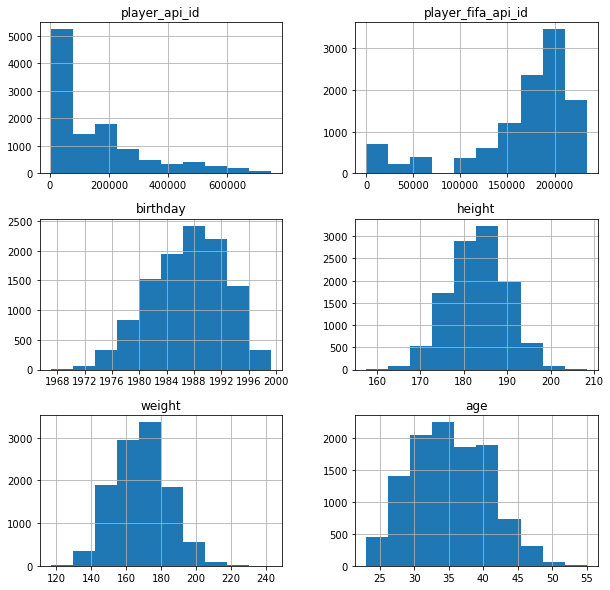

In [12]:
df.hist(figsize=(10,10));

<a id='questions'></a>
### Research Question 1: What is the average age of players?

> The average age of players is 35 years

In [35]:
# Average age of players
int(df['age'].mean())

35

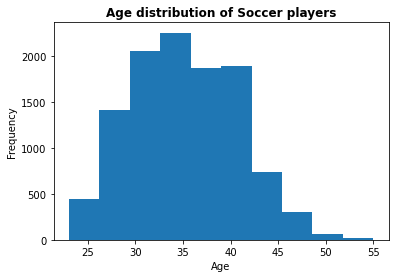

In [25]:
plt.hist(df['age'])
plt.title('Age distribution of Soccer players', fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Frequency");

### Research Question 2: What is the average height of players?

> The average height of players is 181.87cm

In [15]:
df['height'].mean()

181.86744484628662

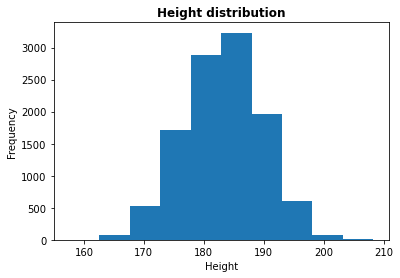

In [26]:
plt.hist(df['height'])
plt.title('Height distribution', fontweight="bold")
plt.xlabel("Height")
plt.ylabel("Frequency");

### Research Question 3: What is the average weight of players?

> The average weight of players is 168.38

In [17]:
df['weight'].mean()

168.38028933092224

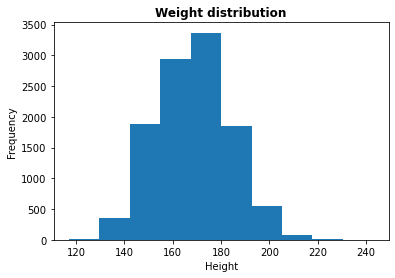

In [29]:
plt.hist(df['weight'])
plt.title('Weight distribution', fontweight="bold")
plt.xlabel("Height")
plt.ylabel("Frequency");

### Question 4: Does the age of the players determine their height?

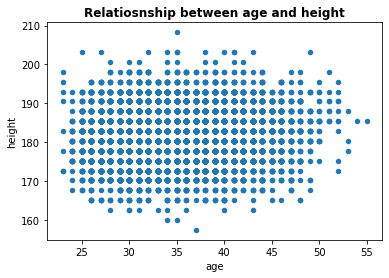

In [34]:
# plotting a scatter chart to check for relationship between age and height
df.plot(x='age', y='height', kind='scatter')
plt.title("Relatiosnship between age and height", fontweight="bold");

There is no relationship between age and height

### Does the age of soccer players determine their weight?

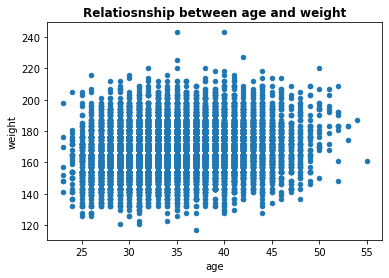

In [33]:
# plotting a scatter chart to check for relationship between age and weight
df.plot(x='age', y='weight', kind='scatter')
plt.title("Relatiosnship between age and weight", fontweight="bold");

There is no correlation between players age and weight

<a id='conclusion'></a>
### Conclusion

In this report, I explored a dataset of soccer players. The aim is to figure out the average age, weight and height of the players, and also to determine if the age of the players determine their height or weight. I loaded the data, wrangled and cleaned it to ensure the data is accurate, valid, complete and consistent for easy analysis.

I found out that the average player's age is 35 years old, the average weight is 168.38 and the average height is 181.87cm. In conclusion, There is no relationship between the age of the players or their height

### Limitation
A limitation of this analysis is that there is not enough data to determine why each players was selected for the match, or dates when they joined the team. A trend analysis of how players are added to the team would have been done. Also, the data has few variables to be explored and only few insights can be gotten from it

<a id='references'></a>
### References
<ul>
<li><a href="https://moonbooks.org/Articles/How-to-convert-a-dataframe-column-of-date-of-birth-DOB-to-column-of-age-with-pandas-in-python-/">https://moonbooks.org/Articles/How-to-convert-a-dataframe-column-of-date-of-birth-DOB-to-column-of-age-with-pandas-in-python-/</a></li>
<li><a href="https://datagy.io/histogram-python/">https://datagy.io/histogram-python/</a></li>
</ul>
